# Titanic dataset

This notebook will guide you through a series of tasks to help you become familiar with pandas, numpy, and matplotlib using the Titanic dataset.

Fields in the Titanic dataset:
- PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.
- Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.
- Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.
- Name: Passenger's name.
- Sex: Passenger's gender.
- Age: Passenger's age.
- SibSp: Number of siblings or spouses travelling with each passenger.
- Parch: Number of parents of children travelling with each passenger.
- Ticket: Ticket number.
- Fare: How much money the passenger has paid for the travel journey.
- Cabin: Cabin number of the passenger.
- Embarked: Port from where the particular passenger was embarked/boarded.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Task 1: Load the data
Read the CSV file into a pandas DataFrame.

In [27]:
titanic_data = pd.read_csv('titanic.csv')
data =  titanic_data.copy()

## Task 2: Display basic information
Use `.info()` to display concise summary information about the DataFrame.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Task 3: Descriptive statistics
Generate descriptive statistics for the dataset using `.describe()`.

In [29]:
data.describe(include = 'all')
#data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Task 4: Missing values
Identify columns with missing values and count the number of missing values in each column.

In [30]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Task 5: Fill missing values
Fill missing values in all columns with the mean of the respective column.

In [31]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)## Fill missing Cabin values with the most frequent one (non-numeric column, mean not applicable)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.isnull().sum()

C:\Users\Nafis Rayaneh\AppData\Local\Temp\ipykernel_15968\706131617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\Nafis Rayaneh\AppData\Local\Temp\ipykernel_15968\706131617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Task 6: Drop columns
Remove the `Name` from the DataFrame because it is not relevant for our analysis.

In [32]:
data.drop(['Name'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S


## Task 7: Filter rows
Filter and display rows where the passengers are female and survived.

In [33]:
data_female_age_25 = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]
data_female_age_25.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,female,27.0,0,2,347742,11.1333,B96 B98,S
9,10,1,2,female,14.0,1,0,237736,30.0708,B96 B98,C


## Task 8: New column
Create a new column `FamilySize` that adds `SibSp` and `Parch` columns.

In [34]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
886,887,0,2,male,27.000000,0,0,211536,13.00,B96 B98,S,0
887,888,1,1,female,19.000000,0,0,112053,30.00,B42,S,0
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.45,B96 B98,S,3
889,890,1,1,male,26.000000,0,0,111369,30.00,C148,C,0
890,891,0,3,male,32.000000,0,0,370376,7.75,B96 B98,Q,0


## Task 9: Sorting
Sort the dataset by `Fare` in descending order.

In [35]:
data.sort_values(by='Fare', ascending=False, inplace=True)
data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
806,807,0,1,male,39.000000,0,0,112050,0.0,A36,S,0
815,816,0,1,male,29.699118,0,0,112058,0.0,B102,S,0
466,467,0,2,male,29.699118,0,0,239853,0.0,B96 B98,S,0
481,482,0,2,male,29.699118,0,0,239854,0.0,B96 B98,S,0
822,823,0,1,male,38.000000,0,0,19972,0.0,B96 B98,S,0


## Task 10: Histogram
Plot a histogram of the `Age` column using matplotlib.

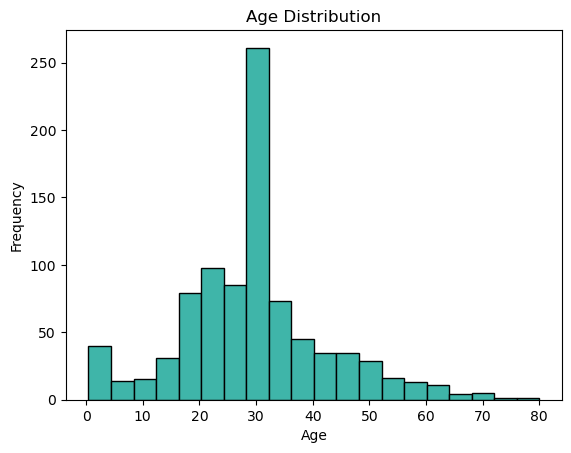

In [36]:
plt.hist(data['Age'], bins=20, edgecolor='black', color="#3FB5A9") 
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## Task 11: Bar chart
Plot a bar chart showing the number of survivors and non-survivors.

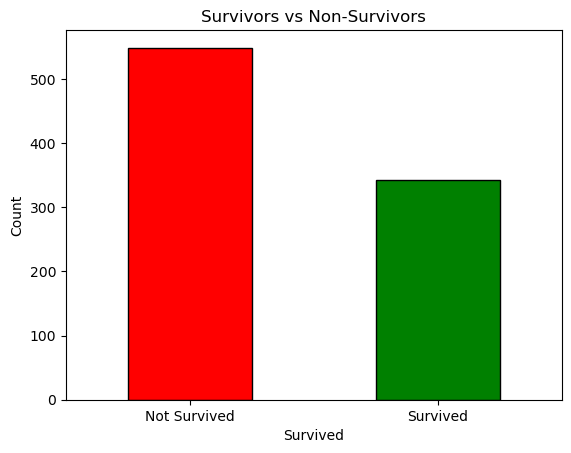

In [37]:
survival_counts = data['Survived'].value_counts()
survival_counts.plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=0)
plt.ylabel('Count')
plt.title('Survivors vs Non-Survivors')
plt.show()

## Task 12: Scatter plot
Create a scatter plot of `Age` vs `Fare` colored by `Survived`.

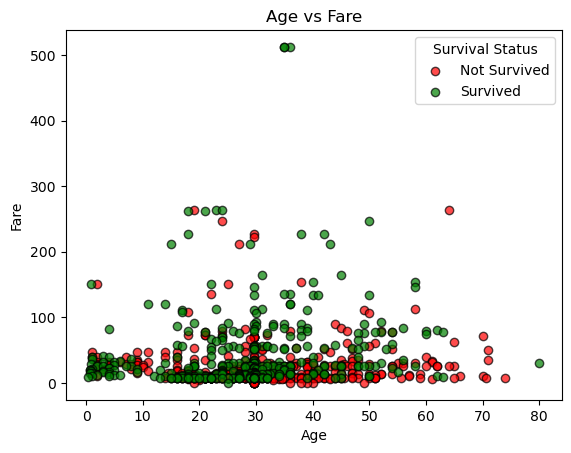

In [38]:
plt.scatter(
    data[data['Survived'] == 0]['Age'],
    data[data['Survived'] == 0]['Fare'],
    color='red',
    alpha=0.7,
    edgecolor='k',
    label='Not Survived'
)
plt.scatter(
    data[data['Survived'] == 1]['Age'],
    data[data['Survived'] == 1]['Fare'],
    color='green',
    alpha=0.7,
    edgecolor='k',
    label='Survived'
)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.legend(title='Survival Status')
plt.show()

## Task 13: Mapping
Map all the alphabetical values in respective columns to numeric values.

In [39]:
data['Sex'] = data['Sex'].map({"male":0 , "female":1})
ticket_map = {ticket: idx for idx, ticket in enumerate(data['Ticket'].unique())}
data['Ticket'] = data['Ticket'].map(ticket_map)
cabin_map = {cabin: idx for idx, cabin in enumerate(data['Cabin'].unique())}
data['Cabin'] = data['Cabin'].map(cabin_map)
embarked_map = {embarked: idx for idx, embarked in enumerate(data['Embarked'].unique())}
data['Embarked'] = data['Embarked'].map(embarked_map)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
679,680,1,1,0,36.0,0,1,0,512.3292,0,0,1
258,259,1,1,1,35.0,0,0,0,512.3292,1,0,0
737,738,1,1,0,35.0,0,0,0,512.3292,2,0,0
88,89,1,1,1,23.0,3,2,1,263.0000,3,1,5
438,439,0,1,0,64.0,1,4,1,263.0000,3,1,5


## Task 14: Correlation
Calculate and display the correlation matrix for the numerical features. (You can use `sns.heatmap()` to plot the correlation matrix.)

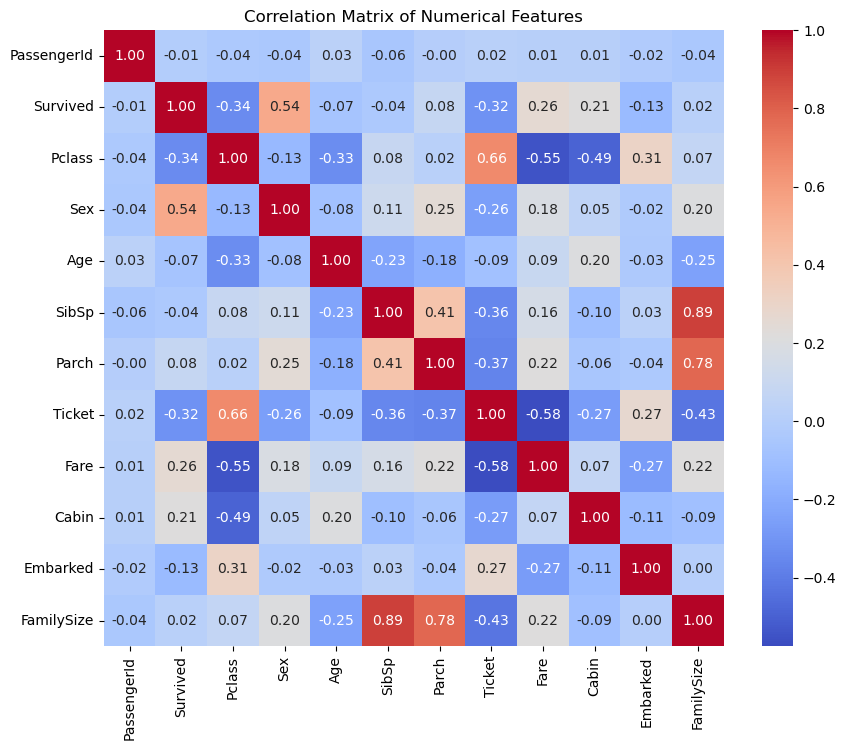

In [ ]:
numeric_features = data.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,         
    cmap='coolwarm', 
    fmt=".2f"           
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Task 15: Normalize data
Normalize all features in the dataset. You can use either Min-Max scaling or mean-std normalization.

In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)
data_normalized.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,0.762921,1.0,0.0,0.0,0.447097,0.000,0.166667,0.000000,1.000000,0.000000,0.0,0.1
1,0.289888,1.0,0.0,1.0,0.434531,0.000,0.000000,0.000000,1.000000,0.006849,0.0,0.0
2,0.828090,1.0,0.0,0.0,0.434531,0.000,0.000000,0.000000,1.000000,0.013699,0.0,0.0
3,0.098876,1.0,0.0,1.0,0.283740,0.375,0.333333,0.001471,0.513342,0.020548,0.5,0.5
4,0.492135,0.0,0.0,0.0,0.798944,0.125,0.666667,0.001471,0.513342,0.020548,0.5,0.5


## Task 16: Survival rate by age group
Create age groups (bins) and calculate the survival rate for each group.

C:\Users\Nafis Rayaneh\AppData\Local\Temp\ipykernel_15968\3071820132.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age = data.groupby('AgeGroup')['Survived'].mean()


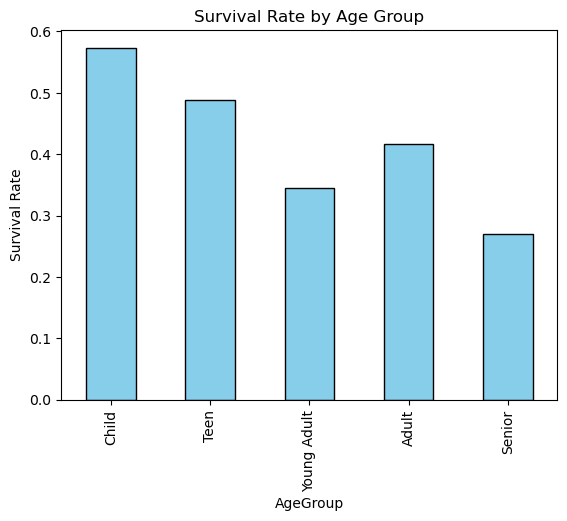

In [46]:
bins = [0, 12, 18, 35, 60, 100]  
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']  
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

survival_rate_by_age = data.groupby('AgeGroup')['Survived'].mean()

survival_rate_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()